# Analisis de fechas de naciemientos en EUA.


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [116]:
births = pd.read_csv("/Users/familiavs/Documents/r-basic-master/data/us-births.csv")

In [117]:
births.shape

(15547, 5)

In [118]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [119]:
births.pivot_table('births', index = 'year', columns='gender', aggfunc='sum')

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023
1974,1543005,1627626
1975,1535546,1618010
1976,1547613,1628863
1977,1623363,1708796


Añadimos una columna para agrupar la informacion en decadas.

In [120]:
#Cociente entero
births['decade'] = (births['year']//10)*10

In [121]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [122]:
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [123]:
#Configura las tonalitades de color
sb.set()

<Figure size 1080x576 with 0 Axes>

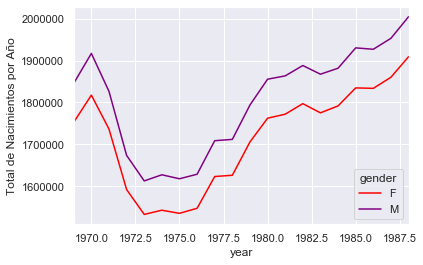

In [176]:
colores = ("red","purple")
plt.figure(figsize=(15, 8))
births.pivot_table('births', index='year', columns='gender', aggfunc="sum").plot(color = colores)
plt.ylabel("Total de Nacimientos por Año")
plt.show()

In [125]:
quartiles = np.percentile(births['births'], [25,50,75])
med = quartiles[1]
IQR = quartiles[2]-quartiles[0]
sig = 0.75*IQR
cumple.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [126]:
#Limpiamos un poco los datos.
births = births.query("(births > @med - 5*@sig) & (births < @med + 5*@sig)")

In [127]:
births.shape
#Observamos que hay muchos menos datos.

(14610, 6)

In [128]:
#Transformacion del dia a entero
births['day'] = births['day'].astype(int)
births.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


In [130]:
#Implementamos un objeto para poder sacar nuevos datos
births.index = pd.to_datetime(10000*births.year+100*births.month+births.day, format = "%Y%m%d")

In [132]:
#Podemos observar que ahora nuestro data set tiene un objeto de fecha en lugar de un numero normal
births.head()

,year,month,day,gender,births,decade
1969-01-01,1969,1,1,F,4046,1960
1969-01-01,1969,1,1,M,4440,1960
1969-01-02,1969,1,2,F,4454,1960
1969-01-02,1969,1,2,M,4548,1960
1969-01-03,1969,1,3,F,4548,1960


In [136]:
#Creamos una nueva columna para obtener el dia de la semana el cual nacio esa persona
births['dayWeek'] = births.index.dayofweek

In [137]:
births.head()

,year,month,day,gender,births,decade,dayWeek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


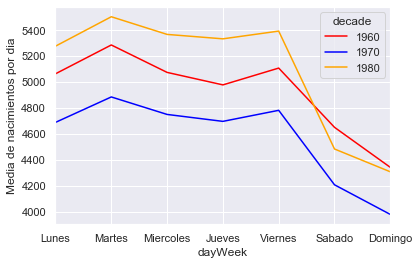

In [174]:
#Revisamos que dia de la semana es cada objeto
colores = ("red","blue","orange")
births.pivot_table('births',index='dayWeek', columns='decade',aggfunc="mean").plot(color = colores)
plt.gca().set_xticklabels(['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo'])
plt.ylabel("Media de nacimientos por dia")
plt.show()

En este grafico podemos ver que los dias sabado y domingo son los dias con menos nacimientos en las 3 decadas mientras que los dias viernes casualmente son los dias con mas nacimientos de las 3 decadas.

In [154]:
#Vemos si hay dias del año donde es mas comun tener un hijo
births_by_date = births.pivot_table('births', index=[births.index.month, births.index.day], aggfunc="mean")

In [166]:
births_by_date.head()

,births
2020-01-01,4009.225
2020-01-02,4247.400
2020-01-03,4500.900
2020-01-04,4571.350
2020-01-05,4603.625


Asi podemos notar que para el dia 1 del mes 1 se obtienen 4009 nacimiento y asi para cada dia y mes

<Figure size 864x288 with 0 Axes>

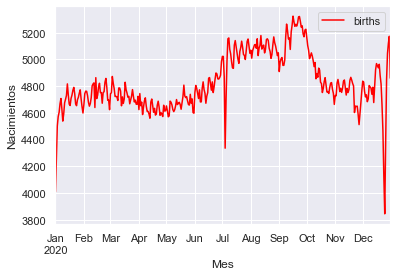

In [178]:
color = "red"
plt.figure(figsize=(12,4))
births_by_date.plot(color="red")
plt.ylabel("Nacimientos")
plt.xlabel("Mes")
plt.show()